In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, validation_curve, learning_curve, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

merged_all = pd.read_csv('merged_all_final.csv')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, validation_curve, learning_curve, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

excel_file = 'C:/Users/Samae/Desktop/merged_all.csv'

# Read all sheets into a dictionary of dataframes
merged_all = pd.read_csv(excel_file)

In [2]:
merged_all

,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z,freq,speed,state
0,0.000000,-4.937590,4.652843,8.306684,0.058107,-0.256938,-0.034284,1003.170769,1.074654,cycling
1,0.017690,-4.518547,4.640880,8.117651,-0.334821,-1.286979,-0.431105,997.969706,-0.691704,cycling
2,0.217690,-3.402893,4.724628,7.923533,-1.759698,-1.050886,-0.014889,996.866920,-1.068595,cycling
3,0.417690,-1.966302,5.062315,9.719048,-0.644444,2.805698,0.562590,999.091508,-0.309168,cycling
4,0.617690,3.619144,1.720140,9.723833,-1.785888,0.112625,0.646200,1002.382521,0.808132,cycling
...,...,...,...,...,...,...,...,...,...,...
11270,543.944153,-1.424926,9.340682,2.584548,-0.007407,0.086893,0.063452,1001.718806,-1.108821,bus
11271,544.151993,-1.451546,9.543773,2.603690,-0.020540,0.024587,-0.010308,996.629201,0.960921,bus
11272,544.359833,-1.383052,9.514760,2.507379,0.011072,0.061085,0.008934,1003.225258,0.393283,bus
11273,544.567672,-1.502393,9.369696,2.595315,0.046577,-0.052075,-0.085213,1001.263836,0.395864,bus


In [102]:
selected_sheet = ['Accelerometer', 'Gyroscope']
bus_1= pd.read_excel('bus_1.xls', sheet_name=selected_sheet)

In [103]:
selected_sheet = ['Accelerometer', 'Gyroscope']
bus_2= pd.read_excel('bus_2.xls', sheet_name=selected_sheet)

In [104]:
doppler_bus_1 = pd.read_excel('doppler_bus_1_final.xls', sheet_name=None)

In [105]:
doppler_bus_1 = pd.concat(doppler_bus_1.values(), ignore_index=True)
doppler_bus_1

,Time (s),Frequency (Hz),Speed (m/s)
0,4.672000,NaN,NaN
1,4.722001,NaN,NaN
2,5.274000,NaN,NaN
3,5.324001,NaN,NaN
4,5.374002,NaN,NaN
...,...,...,...
7687,389.682007,995.777907,-1.441598
7688,389.732008,1000.796403,0.270561
7689,389.782009,997.482569,-0.858087
7690,389.832010,999.009680,-0.337043


In [106]:
#push all missing values to the end of the dataframe
doppler_bus_1 = doppler_bus_1.apply(lambda x: pd.Series(x.dropna().values))

In [107]:
#drop all missing values
doppler_bus_1 = doppler_bus_1.dropna()
doppler_bus_1


,Time (s),Frequency (Hz),Speed (m/s)
0,4.672000,997.512749,-0.847774
1,4.722001,998.577186,-0.484446
2,5.274000,996.520872,-1.187033
3,5.324001,1003.912388,1.325028
4,5.374002,999.487110,-0.174472
...,...,...,...
1411,75.769002,995.777907,-1.441598
1412,75.819003,1000.796403,0.270561
1413,75.869004,997.482569,-0.858087
1414,75.919005,999.009680,-0.337043


In [123]:
doppler_bus_2= pd.read_excel('doppler_bus_2_final.xls', sheet_name=None)

In [109]:
bus_1 = pd.concat(bus_1.values(), ignore_index=True)
bus_1 

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s)
0,0.242425,-3.049653,7.142276,6.532406,NaN,NaN,NaN
1,0.440356,-2.635096,7.584949,6.132206,NaN,NaN,NaN
2,0.638287,-3.158526,8.811569,6.089136,NaN,NaN,NaN
3,0.836218,-2.950051,8.841479,5.442176,NaN,NaN,NaN
4,1.034148,-1.581656,6.358926,5.889634,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4403,457.598875,NaN,NaN,NaN,-0.168441,0.109265,0.041385
4404,457.806710,NaN,NaN,NaN,0.001298,0.226548,0.346885
4405,458.014545,NaN,NaN,NaN,-0.157446,0.148054,0.010003
4406,458.222380,NaN,NaN,NaN,-0.036727,0.245102,-0.006796


In [110]:
#rename the columns of bus_1 to Time (s), A_x, A_y,	A_z	,Gyr_x,	Gyr_y	,Gyr_z
bus_1.columns = ['Time (s)', 'A_x', 'A_y', 'A_z', 'Gyr_x', 'Gyr_y', 'Gyr_z']
bus_1


,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z
0,0.242425,-3.049653,7.142276,6.532406,NaN,NaN,NaN
1,0.440356,-2.635096,7.584949,6.132206,NaN,NaN,NaN
2,0.638287,-3.158526,8.811569,6.089136,NaN,NaN,NaN
3,0.836218,-2.950051,8.841479,5.442176,NaN,NaN,NaN
4,1.034148,-1.581656,6.358926,5.889634,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4403,457.598875,NaN,NaN,NaN,-0.168441,0.109265,0.041385
4404,457.806710,NaN,NaN,NaN,0.001298,0.226548,0.346885
4405,458.014545,NaN,NaN,NaN,-0.157446,0.148054,0.010003
4406,458.222380,NaN,NaN,NaN,-0.036727,0.245102,-0.006796


In [111]:
bus_1 = bus_1.apply(lambda x: pd.Series(x.dropna().values))
bus_1

,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z
0,0.242425,-3.049653,7.142276,6.532406,-0.037491,0.151185,0.142404
1,0.440356,-2.635096,7.584949,6.132206,-0.020158,0.640931,0.556940
2,0.638287,-3.158526,8.811569,6.089136,0.134921,1.358753,1.260942
3,0.836218,-2.950051,8.841479,5.442176,-0.225479,1.733737,2.050767
4,1.034148,-1.581656,6.358926,5.889634,-0.400869,1.195504,0.973461
...,...,...,...,...,...,...,...
4403,457.598875,NaN,NaN,NaN,NaN,NaN,NaN
4404,457.806710,NaN,NaN,NaN,NaN,NaN,NaN
4405,458.014545,NaN,NaN,NaN,NaN,NaN,NaN
4406,458.222380,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
#drop all the rows with NaN values
bus_1 = bus_1.dropna()
bus_1


,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z
0,0.242425,-3.049653,7.142276,6.532406,-0.037491,0.151185,0.142404
1,0.440356,-2.635096,7.584949,6.132206,-0.020158,0.640931,0.556940
2,0.638287,-3.158526,8.811569,6.089136,0.134921,1.358753,1.260942
3,0.836218,-2.950051,8.841479,5.442176,-0.225479,1.733737,2.050767
4,1.034148,-1.581656,6.358926,5.889634,-0.400869,1.195504,0.973461
...,...,...,...,...,...,...,...
2199,457.601375,-0.479462,8.864810,4.826622,-0.168441,0.109265,0.041385
2200,457.809210,0.070289,8.684750,4.950750,0.001298,0.226548,0.346885
2201,458.017045,0.268594,8.830113,4.859823,-0.157446,0.148054,0.010003
2202,458.224880,-0.129212,8.541181,5.143073,-0.036727,0.245102,-0.006796


In [113]:
#merge bus_1 and doppler_bus_1
merged_bus_1 = pd.merge(bus_1, doppler_bus_1, on='Time (s)', how='outer')
merged_bus_1


,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z,Frequency (Hz),Speed (m/s)
0,0.242425,-3.049653,7.142276,6.532406,-0.037491,0.151185,0.142404,NaN,NaN
1,0.440356,-2.635096,7.584949,6.132206,-0.020158,0.640931,0.556940,NaN,NaN
2,0.638287,-3.158526,8.811569,6.089136,0.134921,1.358753,1.260942,NaN,NaN
3,0.836218,-2.950051,8.841479,5.442176,-0.225479,1.733737,2.050767,NaN,NaN
4,1.034148,-1.581656,6.358926,5.889634,-0.400869,1.195504,0.973461,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3615,75.769002,NaN,NaN,NaN,NaN,NaN,NaN,995.777907,-1.441598
3616,75.819003,NaN,NaN,NaN,NaN,NaN,NaN,1000.796403,0.270561
3617,75.869004,NaN,NaN,NaN,NaN,NaN,NaN,997.482569,-0.858087
3618,75.919005,NaN,NaN,NaN,NaN,NaN,NaN,999.009680,-0.337043


In [114]:
#push all missing values to the end of the dataframe and drop all the rows with NaN values
merged_bus_1 = merged_bus_1.apply(lambda x: pd.Series(x.dropna().values))
merged_bus_1 = merged_bus_1.dropna()
merged_bus_1


,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z,Frequency (Hz),Speed (m/s)
0,0.242425,-3.049653,7.142276,6.532406,-0.037491,0.151185,0.142404,997.512749,-0.847774
1,0.440356,-2.635096,7.584949,6.132206,-0.020158,0.640931,0.556940,998.577186,-0.484446
2,0.638287,-3.158526,8.811569,6.089136,0.134921,1.358753,1.260942,996.520872,-1.187033
3,0.836218,-2.950051,8.841479,5.442176,-0.225479,1.733737,2.050767,1003.912388,1.325028
4,1.034148,-1.581656,6.358926,5.889634,-0.400869,1.195504,0.973461,999.487110,-0.174472
...,...,...,...,...,...,...,...,...,...
1411,293.718651,-0.428315,9.496515,2.539981,0.066811,0.020845,-0.010613,995.777907,-1.441598
1412,293.926485,-0.315254,9.444172,2.975176,0.159049,-0.031535,-0.077578,1000.796403,0.270561
1413,294.134320,-0.327219,9.337991,2.758626,-0.012293,-0.036574,-0.021074,997.482569,-0.858087
1414,294.342154,-0.523131,9.195019,2.636292,-0.059252,-0.008781,0.027259,999.009680,-0.337043


In [115]:
#rename freuqency column to freq
merged_bus_1 = merged_bus_1.rename(columns={'Frequency (Hz)': 'freq'})
merged_bus_1

,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z,freq,Speed (m/s)
0,0.242425,-3.049653,7.142276,6.532406,-0.037491,0.151185,0.142404,997.512749,-0.847774
1,0.440356,-2.635096,7.584949,6.132206,-0.020158,0.640931,0.556940,998.577186,-0.484446
2,0.638287,-3.158526,8.811569,6.089136,0.134921,1.358753,1.260942,996.520872,-1.187033
3,0.836218,-2.950051,8.841479,5.442176,-0.225479,1.733737,2.050767,1003.912388,1.325028
4,1.034148,-1.581656,6.358926,5.889634,-0.400869,1.195504,0.973461,999.487110,-0.174472
...,...,...,...,...,...,...,...,...,...
1411,293.718651,-0.428315,9.496515,2.539981,0.066811,0.020845,-0.010613,995.777907,-1.441598
1412,293.926485,-0.315254,9.444172,2.975176,0.159049,-0.031535,-0.077578,1000.796403,0.270561
1413,294.134320,-0.327219,9.337991,2.758626,-0.012293,-0.036574,-0.021074,997.482569,-0.858087
1414,294.342154,-0.523131,9.195019,2.636292,-0.059252,-0.008781,0.027259,999.009680,-0.337043


In [116]:
merged_bus_1 = merged_bus_1.rename(columns={'Speed (m/s)': 'speed'})
merged_bus_1

,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z,freq,speed
0,0.242425,-3.049653,7.142276,6.532406,-0.037491,0.151185,0.142404,997.512749,-0.847774
1,0.440356,-2.635096,7.584949,6.132206,-0.020158,0.640931,0.556940,998.577186,-0.484446
2,0.638287,-3.158526,8.811569,6.089136,0.134921,1.358753,1.260942,996.520872,-1.187033
3,0.836218,-2.950051,8.841479,5.442176,-0.225479,1.733737,2.050767,1003.912388,1.325028
4,1.034148,-1.581656,6.358926,5.889634,-0.400869,1.195504,0.973461,999.487110,-0.174472
...,...,...,...,...,...,...,...,...,...
1411,293.718651,-0.428315,9.496515,2.539981,0.066811,0.020845,-0.010613,995.777907,-1.441598
1412,293.926485,-0.315254,9.444172,2.975176,0.159049,-0.031535,-0.077578,1000.796403,0.270561
1413,294.134320,-0.327219,9.337991,2.758626,-0.012293,-0.036574,-0.021074,997.482569,-0.858087
1414,294.342154,-0.523131,9.195019,2.636292,-0.059252,-0.008781,0.027259,999.009680,-0.337043


In [117]:
#add one column to the dataframe and name it as 'stat' and each value in this column is bus
merged_bus_1['state'] = 'bus'
merged_bus_1


,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z,freq,speed,state
0,0.242425,-3.049653,7.142276,6.532406,-0.037491,0.151185,0.142404,997.512749,-0.847774,bus
1,0.440356,-2.635096,7.584949,6.132206,-0.020158,0.640931,0.556940,998.577186,-0.484446,bus
2,0.638287,-3.158526,8.811569,6.089136,0.134921,1.358753,1.260942,996.520872,-1.187033,bus
3,0.836218,-2.950051,8.841479,5.442176,-0.225479,1.733737,2.050767,1003.912388,1.325028,bus
4,1.034148,-1.581656,6.358926,5.889634,-0.400869,1.195504,0.973461,999.487110,-0.174472,bus
...,...,...,...,...,...,...,...,...,...,...
1411,293.718651,-0.428315,9.496515,2.539981,0.066811,0.020845,-0.010613,995.777907,-1.441598,bus
1412,293.926485,-0.315254,9.444172,2.975176,0.159049,-0.031535,-0.077578,1000.796403,0.270561,bus
1413,294.134320,-0.327219,9.337991,2.758626,-0.012293,-0.036574,-0.021074,997.482569,-0.858087,bus
1414,294.342154,-0.523131,9.195019,2.636292,-0.059252,-0.008781,0.027259,999.009680,-0.337043,bus


In [118]:
#add merged_bus_1 to merged_all
merged_all = merged_all.append(merged_bus_1, ignore_index=True)
merged_all


/var/folders/wr/n1gn41j97w53l7jc_kv9fb9w0000gn/T/ipykernel_62605/64076329.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_all = merged_all.append(merged_bus_1, ignore_index=True)


,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z,freq,speed,state
0,0.000000,-4.937590,4.652843,8.306684,0.058107,-0.256938,-0.034284,1003.170769,1.074654,cycling
1,0.017690,-4.518547,4.640880,8.117651,-0.334821,-1.286979,-0.431105,997.969706,-0.691704,cycling
2,0.217690,-3.402893,4.724628,7.923533,-1.759698,-1.050886,-0.014889,996.866920,-1.068595,cycling
3,0.417690,-1.966302,5.062315,9.719048,-0.644444,2.805698,0.562590,999.091508,-0.309168,cycling
4,0.617690,3.619144,1.720140,9.723833,-1.785888,0.112625,0.646200,1002.382521,0.808132,cycling
...,...,...,...,...,...,...,...,...,...,...
8650,293.718651,-0.428315,9.496515,2.539981,0.066811,0.020845,-0.010613,995.777907,-1.441598,bus
8651,293.926485,-0.315254,9.444172,2.975176,0.159049,-0.031535,-0.077578,1000.796403,0.270561,bus
8652,294.134320,-0.327219,9.337991,2.758626,-0.012293,-0.036574,-0.021074,997.482569,-0.858087,bus
8653,294.342154,-0.523131,9.195019,2.636292,-0.059252,-0.008781,0.027259,999.009680,-0.337043,bus


In [119]:
bus_2 = pd.concat(bus_2.values(), ignore_index=True)
bus_2 

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s)
0,0.225398,-3.862614,6.362216,6.245267,NaN,NaN,NaN
1,0.423331,-2.922534,7.021738,6.476773,NaN,NaN,NaN
2,0.621263,-2.693720,7.208677,5.849255,NaN,NaN,NaN
3,0.819196,-2.100599,7.570891,5.655735,NaN,NaN,NaN
4,1.017129,-1.585245,7.947162,6.114260,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6093,633.144505,NaN,NaN,NaN,-0.052609,-0.546708,-0.133776
6094,633.352347,NaN,NaN,NaN,0.070553,-0.710263,-0.205321
6095,633.560189,NaN,NaN,NaN,0.091016,-0.525100,-0.332225
6096,633.768030,NaN,NaN,NaN,0.114228,-0.316113,-0.140113


In [120]:
#rename the columns of bus_2 to Time (s), A_x, A_y,	A_z	,Gyr_x,	Gyr_y	,Gyr_z
bus_2.columns = ['Time (s)', 'A_x', 'A_y', 'A_z', 'Gyr_x', 'Gyr_y', 'Gyr_z']
bus_2

,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z
0,0.225398,-3.862614,6.362216,6.245267,NaN,NaN,NaN
1,0.423331,-2.922534,7.021738,6.476773,NaN,NaN,NaN
2,0.621263,-2.693720,7.208677,5.849255,NaN,NaN,NaN
3,0.819196,-2.100599,7.570891,5.655735,NaN,NaN,NaN
4,1.017129,-1.585245,7.947162,6.114260,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6093,633.144505,NaN,NaN,NaN,-0.052609,-0.546708,-0.133776
6094,633.352347,NaN,NaN,NaN,0.070553,-0.710263,-0.205321
6095,633.560189,NaN,NaN,NaN,0.091016,-0.525100,-0.332225
6096,633.768030,NaN,NaN,NaN,0.114228,-0.316113,-0.140113


In [121]:
#push all missing values to the end of the dataframe and drop all the rows with NaN values
bus_2 = bus_2.apply(lambda x: pd.Series(x.dropna().values))
bus_2 = bus_2.dropna()
bus_2


,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z
0,0.225398,-3.862614,6.362216,6.245267,0.200205,-0.557856,0.371853
1,0.423331,-2.922534,7.021738,6.476773,0.266253,-0.308401,0.266635
2,0.621263,-2.693720,7.208677,5.849255,0.338333,0.013439,0.281906
3,0.819196,-2.100599,7.570891,5.655735,-0.252585,-0.072996,0.049479
4,1.017129,-1.585245,7.947162,6.114260,0.219065,-0.199518,0.069178
...,...,...,...,...,...,...,...
3044,633.147005,-0.937388,9.138788,3.772584,-0.052609,-0.546708,-0.133776
3045,633.354847,-0.533300,9.214461,3.806083,0.070553,-0.710263,-0.205321
3046,633.562689,-0.331705,9.047860,3.663711,0.091016,-0.525100,-0.332225
3047,633.770530,-0.457926,9.497711,3.462414,0.114228,-0.316113,-0.140113


In [124]:
doppler_bus_2 = pd.concat(doppler_bus_2.values(), ignore_index=True)
doppler_bus_2 

,Time (s),Frequency (Hz),Speed (m/s)
0,0.278000,NaN,NaN
1,0.328001,NaN,NaN
2,0.887000,NaN,NaN
3,0.937001,NaN,NaN
4,0.987002,NaN,NaN
...,...,...,...
12872,0.300006,NaN,NaN
12873,0.350007,NaN,NaN
12874,0.400008,NaN,NaN
12875,0.450009,NaN,NaN


In [125]:
#push all missing values to the end of the dataframe and drop all the rows with NaN values
doppler_bus_2 = doppler_bus_2.apply(lambda x: pd.Series(x.dropna().values))
doppler_bus_2 = doppler_bus_2.dropna()
doppler_bus_2


,Time (s),Frequency (Hz),Speed (m/s)
0,0.278000,999.338681,3.128042
1,0.328001,1004.065264,1.965523
2,0.887000,1002.124361,-2.551736
3,0.937001,998.993588,1.900346
4,0.987002,1001.733167,-0.224997
...,...,...,...
2615,131.538009,1001.718806,-1.108821
2616,131.588010,996.629201,0.960921
2617,131.638012,1003.225258,0.393283
2618,131.690000,1001.263836,0.395864


In [126]:
#merge bus_2 and doppler_bus_2
merged_bus_2 = pd.merge(bus_2, doppler_bus_2, on='Time (s)', how='outer')
merged_bus_2


,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z,Frequency (Hz),Speed (m/s)
0,0.225398,-3.862614,6.362216,6.245267,0.200205,-0.557856,0.371853,NaN,NaN
1,0.423331,-2.922534,7.021738,6.476773,0.266253,-0.308401,0.266635,NaN,NaN
2,0.621263,-2.693720,7.208677,5.849255,0.338333,0.013439,0.281906,NaN,NaN
3,0.819196,-2.100599,7.570891,5.655735,-0.252585,-0.072996,0.049479,NaN,NaN
4,1.017129,-1.585245,7.947162,6.114260,0.219065,-0.199518,0.069178,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5664,131.538009,NaN,NaN,NaN,NaN,NaN,NaN,1001.718806,-1.108821
5665,131.588010,NaN,NaN,NaN,NaN,NaN,NaN,996.629201,0.960921
5666,131.638012,NaN,NaN,NaN,NaN,NaN,NaN,1003.225258,0.393283
5667,131.690000,NaN,NaN,NaN,NaN,NaN,NaN,1001.263836,0.395864


In [127]:
#push all missing values to the end of the dataframe and drop all the rows with NaN values
merged_bus_2 = merged_bus_2.apply(lambda x: pd.Series(x.dropna().values))
merged_bus_2 = merged_bus_2.dropna()
merged_bus_2


,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z,Frequency (Hz),Speed (m/s)
0,0.225398,-3.862614,6.362216,6.245267,0.200205,-0.557856,0.371853,999.338681,3.128042
1,0.423331,-2.922534,7.021738,6.476773,0.266253,-0.308401,0.266635,1004.065264,1.965523
2,0.621263,-2.693720,7.208677,5.849255,0.338333,0.013439,0.281906,1002.124361,-2.551736
3,0.819196,-2.100599,7.570891,5.655735,-0.252585,-0.072996,0.049479,998.993588,1.900346
4,1.017129,-1.585245,7.947162,6.114260,0.219065,-0.199518,0.069178,1001.733167,-0.224997
...,...,...,...,...,...,...,...,...,...
2615,543.944153,-1.424926,9.340682,2.584548,-0.007407,0.086893,0.063452,1001.718806,-1.108821
2616,544.151993,-1.451546,9.543773,2.603690,-0.020540,0.024587,-0.010308,996.629201,0.960921
2617,544.359833,-1.383052,9.514760,2.507379,0.011072,0.061085,0.008934,1003.225258,0.393283
2618,544.567672,-1.502393,9.369696,2.595315,0.046577,-0.052075,-0.085213,1001.263836,0.395864


In [128]:
#rename freuqency column to freq and speed column to speed
merged_bus_2 = merged_bus_2.rename(columns={'Frequency (Hz)': 'freq'})
merged_bus_2 = merged_bus_2.rename(columns={'Speed (m/s)': 'speed'})
merged_bus_2


,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z,freq,speed
0,0.225398,-3.862614,6.362216,6.245267,0.200205,-0.557856,0.371853,999.338681,3.128042
1,0.423331,-2.922534,7.021738,6.476773,0.266253,-0.308401,0.266635,1004.065264,1.965523
2,0.621263,-2.693720,7.208677,5.849255,0.338333,0.013439,0.281906,1002.124361,-2.551736
3,0.819196,-2.100599,7.570891,5.655735,-0.252585,-0.072996,0.049479,998.993588,1.900346
4,1.017129,-1.585245,7.947162,6.114260,0.219065,-0.199518,0.069178,1001.733167,-0.224997
...,...,...,...,...,...,...,...,...,...
2615,543.944153,-1.424926,9.340682,2.584548,-0.007407,0.086893,0.063452,1001.718806,-1.108821
2616,544.151993,-1.451546,9.543773,2.603690,-0.020540,0.024587,-0.010308,996.629201,0.960921
2617,544.359833,-1.383052,9.514760,2.507379,0.011072,0.061085,0.008934,1003.225258,0.393283
2618,544.567672,-1.502393,9.369696,2.595315,0.046577,-0.052075,-0.085213,1001.263836,0.395864


In [129]:
#add one column to the dataframe and name it as 'state' and each value in this column is bus
merged_bus_2['state'] = 'bus'
merged_bus_2


,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z,freq,speed,state
0,0.225398,-3.862614,6.362216,6.245267,0.200205,-0.557856,0.371853,999.338681,3.128042,bus
1,0.423331,-2.922534,7.021738,6.476773,0.266253,-0.308401,0.266635,1004.065264,1.965523,bus
2,0.621263,-2.693720,7.208677,5.849255,0.338333,0.013439,0.281906,1002.124361,-2.551736,bus
3,0.819196,-2.100599,7.570891,5.655735,-0.252585,-0.072996,0.049479,998.993588,1.900346,bus
4,1.017129,-1.585245,7.947162,6.114260,0.219065,-0.199518,0.069178,1001.733167,-0.224997,bus
...,...,...,...,...,...,...,...,...,...,...
2615,543.944153,-1.424926,9.340682,2.584548,-0.007407,0.086893,0.063452,1001.718806,-1.108821,bus
2616,544.151993,-1.451546,9.543773,2.603690,-0.020540,0.024587,-0.010308,996.629201,0.960921,bus
2617,544.359833,-1.383052,9.514760,2.507379,0.011072,0.061085,0.008934,1003.225258,0.393283,bus
2618,544.567672,-1.502393,9.369696,2.595315,0.046577,-0.052075,-0.085213,1001.263836,0.395864,bus


In [130]:
#add merged_bus_2 to merged_all
merged_all = merged_all.append(merged_bus_2, ignore_index=True)
merged_all


/var/folders/wr/n1gn41j97w53l7jc_kv9fb9w0000gn/T/ipykernel_62605/3376981114.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_all = merged_all.append(merged_bus_2, ignore_index=True)


,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z,freq,speed,state
0,0.000000,-4.937590,4.652843,8.306684,0.058107,-0.256938,-0.034284,1003.170769,1.074654,cycling
1,0.017690,-4.518547,4.640880,8.117651,-0.334821,-1.286979,-0.431105,997.969706,-0.691704,cycling
2,0.217690,-3.402893,4.724628,7.923533,-1.759698,-1.050886,-0.014889,996.866920,-1.068595,cycling
3,0.417690,-1.966302,5.062315,9.719048,-0.644444,2.805698,0.562590,999.091508,-0.309168,cycling
4,0.617690,3.619144,1.720140,9.723833,-1.785888,0.112625,0.646200,1002.382521,0.808132,cycling
...,...,...,...,...,...,...,...,...,...,...
11270,543.944153,-1.424926,9.340682,2.584548,-0.007407,0.086893,0.063452,1001.718806,-1.108821,bus
11271,544.151993,-1.451546,9.543773,2.603690,-0.020540,0.024587,-0.010308,996.629201,0.960921,bus
11272,544.359833,-1.383052,9.514760,2.507379,0.011072,0.061085,0.008934,1003.225258,0.393283,bus
11273,544.567672,-1.502393,9.369696,2.595315,0.046577,-0.052075,-0.085213,1001.263836,0.395864,bus


In [132]:
merged_all.isnull().sum()


Time (s)    0
A_x         0
A_y         0
A_z         0
Gyr_x       0
Gyr_y       0
Gyr_z       0
freq        0
speed       0
state       0
dtype: int64

In [131]:
#save merged_all to csv file
merged_all.to_csv('merged_all_final.csv', index=False)

Data Exploration 

In [3]:
#describe the data
merged_all.describe()

,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z,freq,speed
count,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000,11275.000000
mean,98.531907,0.806973,5.597125,3.296152,-0.003221,-0.002661,0.001201,1000.165421,0.052491
std,132.392486,2.455903,4.892970,3.677989,0.636855,0.664277,0.746203,2.719261,0.954707
min,0.000000,-11.222291,-21.129211,-21.007603,-7.539942,-10.884785,-8.746300,995.091437,-3.254816
25%,18.228093,-0.538086,1.445393,1.340672,-0.045050,-0.061161,-0.047819,997.759369,-0.770860
50%,35.882952,0.076869,9.072686,2.396113,0.001222,0.000916,-0.000076,1000.113122,0.036681
75%,126.692389,2.040510,9.616455,4.563137,0.046501,0.070362,0.055322,1002.534128,0.866771
max,544.779470,28.539904,16.442579,29.992237,13.271033,6.964126,9.688485,1004.943898,3.368304


In [4]:
merged_all

,Time (s),A_x,A_y,A_z,Gyr_x,Gyr_y,Gyr_z,freq,speed,state
0,0.000000,-4.937590,4.652843,8.306684,0.058107,-0.256938,-0.034284,1003.170769,1.074654,cycling
1,0.017690,-4.518547,4.640880,8.117651,-0.334821,-1.286979,-0.431105,997.969706,-0.691704,cycling
2,0.217690,-3.402893,4.724628,7.923533,-1.759698,-1.050886,-0.014889,996.866920,-1.068595,cycling
3,0.417690,-1.966302,5.062315,9.719048,-0.644444,2.805698,0.562590,999.091508,-0.309168,cycling
4,0.617690,3.619144,1.720140,9.723833,-1.785888,0.112625,0.646200,1002.382521,0.808132,cycling
...,...,...,...,...,...,...,...,...,...,...
11270,543.944153,-1.424926,9.340682,2.584548,-0.007407,0.086893,0.063452,1001.718806,-1.108821,bus
11271,544.151993,-1.451546,9.543773,2.603690,-0.020540,0.024587,-0.010308,996.629201,0.960921,bus
11272,544.359833,-1.383052,9.514760,2.507379,0.011072,0.061085,0.008934,1003.225258,0.393283,bus
11273,544.567672,-1.502393,9.369696,2.595315,0.046577,-0.052075,-0.085213,1001.263836,0.395864,bus


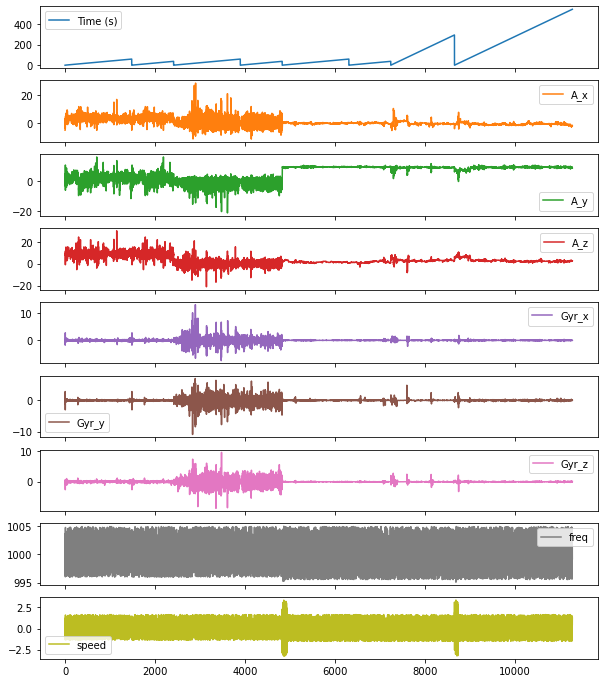

In [5]:
#plot the data
merged_all.plot(subplots=True, figsize=(10,12))
plt.show()


In [6]:
merged_all.isnull().sum()

Time (s)    0
A_x         0
A_y         0
A_z         0
Gyr_x       0
Gyr_y       0
Gyr_z       0
freq        0
speed       0
state       0
dtype: int64

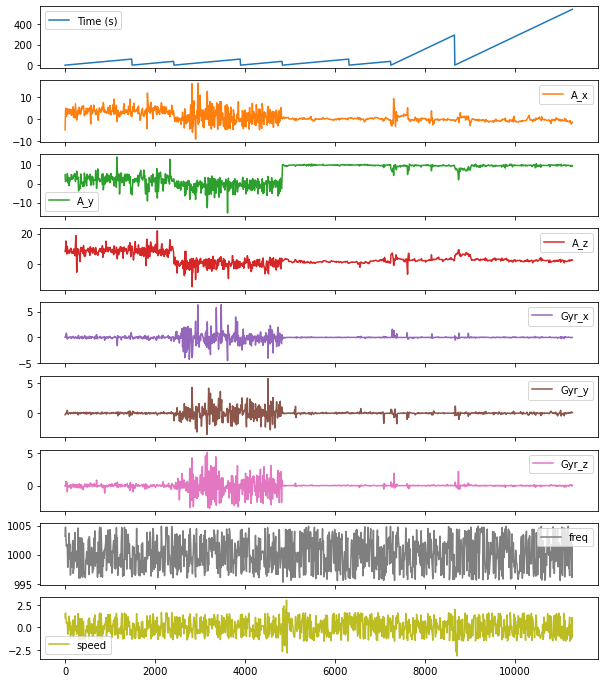

In [7]:
#plot the data with stepsize of 10
merged_all.iloc[::10].plot(subplots=True, figsize=(10,12))
plt.show()


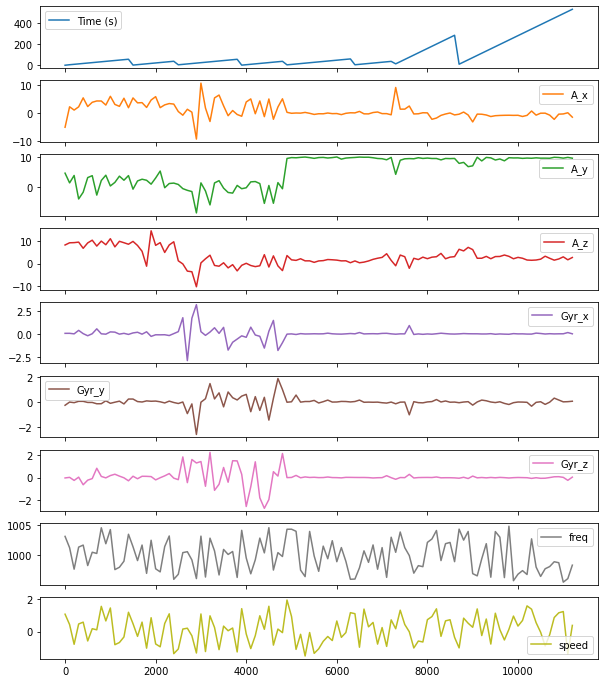

In [12]:
#plot the data with stepsize of 10
merged_all.iloc[::100].plot(subplots=True, figsize=(10,12))
plt.show()


In [13]:
#show percentage of cases for each class
merged_all['state'].value_counts(normalize=True) * 100


bus        35.796009
cycling    21.401330
walking    21.401330
metro      21.401330
Name: state, dtype: float64

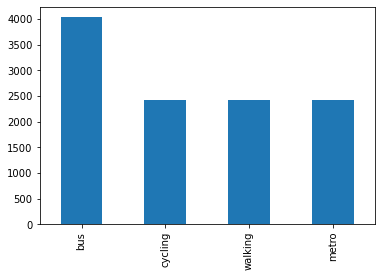

In [14]:
#show distribution of each class
merged_all['state'].value_counts().plot(kind='bar')
plt.show()


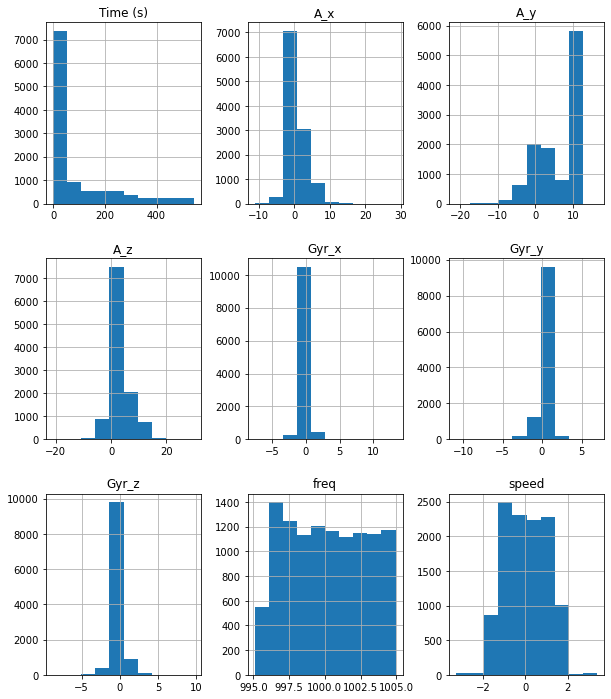

In [15]:
#show distribution of all features 
merged_all.hist(figsize=(10,12))
plt.show()

Data preparation 

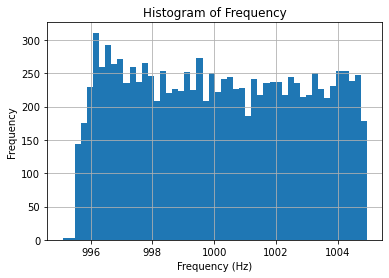

In [133]:
#plot the histogram of the frequency column
merged_all['freq'].hist(bins=50)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Frequency')
plt.title('Histogram of Frequency')
plt.show()


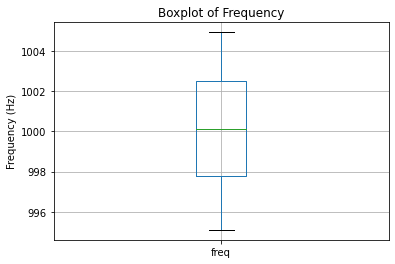

In [134]:
#plot boxplot of the frequency column
merged_all.boxplot(column='freq')
plt.ylabel('Frequency (Hz)')
plt.title('Boxplot of Frequency')
plt.show()


In [27]:
import numpy as np
import matplotlib.pyplot as plt

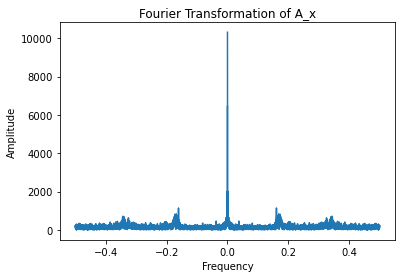

In [5]:
column_to_transform = 'A_x'

# Get the data from the selected column
column_data = merged_all[column_to_transform].values

# Apply Fourier transformation
transformed_data = np.fft.fft(column_data)

# Calculate the frequencies corresponding to the transformed data
frequencies = np.fft.fftfreq(len(column_data))

# Plot the Fourier transformation
plt.plot(frequencies, np.abs(transformed_data))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transformation of {}'.format(column_to_transform))
plt.show()

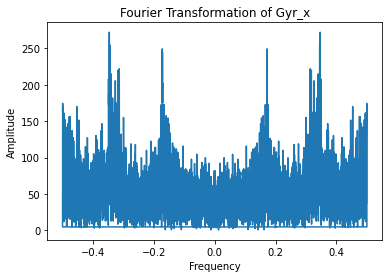

In [8]:
column_to_transform = 'Gyr_x'

# Get the data from the selected column
column_data = merged_all[column_to_transform].values

# Apply Fourier transformation
transformed_data = np.fft.fft(column_data)

# Calculate the frequencies corresponding to the transformed data
frequencies = np.fft.fftfreq(len(column_data))

# Plot the Fourier transformation
plt.plot(frequencies, np.abs(transformed_data))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transformation of {}'.format(column_to_transform))
plt.show()

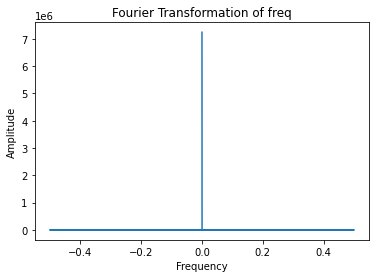

In [9]:
column_to_transform = 'freq'

# Get the data from the selected column
column_data = merged_all[column_to_transform].values

# Apply Fourier transformation
transformed_data = np.fft.fft(column_data)

# Calculate the frequencies corresponding to the transformed data
frequencies = np.fft.fftfreq(len(column_data))

# Plot the Fourier transformation
plt.plot(frequencies, np.abs(transformed_data))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transformation of {}'.format(column_to_transform))
plt.show()

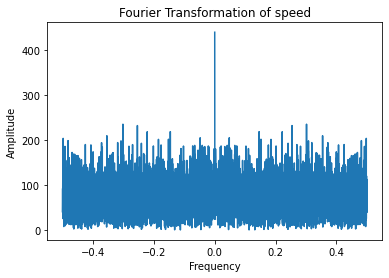

In [10]:
column_to_transform = 'speed'

# Get the data from the selected column
column_data = merged_all[column_to_transform].values

# Apply Fourier transformation
transformed_data = np.fft.fft(column_data)

# Calculate the frequencies corresponding to the transformed data
frequencies = np.fft.fftfreq(len(column_data))

# Plot the Fourier transformation
plt.plot(frequencies, np.abs(transformed_data))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transformation of {}'.format(column_to_transform))
plt.show()

In [28]:
X = merged_all.drop('state', axis=1)
y = merged_all['state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=66)

## NB

In [12]:
GB = GaussianNB()

In [13]:
GB.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred = GB.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9857274401473296


In [16]:
#get F1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.9857493097681556

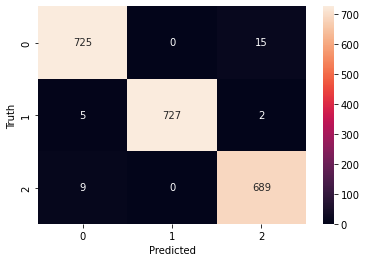

In [17]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


## KNN

In [29]:
def train_knn(X_train, y_train):
    from matplotlib import pyplot as plt
    parameter = {'n_neighbors': [5,6,7,8,9,10,11,12,13,14,15]}
    knn = KNeighborsClassifier()

    clf = GridSearchCV(knn, parameter, cv=5, n_jobs=5)
    clf.fit(X_train, y_train)

    print(f'The best K value is：{(clf.best_params_)["n_neighbors"]}', "Acc：%.2f" % clf.best_score_)

    return clf

def get_output():
    from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
    knn = train_knn(X_train, y_train)
    print("The score for kNN without cross val and without using smote is")
    print("Training set: {:6.2f}%".format(100 * knn.score(X_train, y_train)))
    print("Test set: {:6.2f}%".format(100 * knn.score(X_test, y_test)))
    # prediction
    y_pred_KNN = knn.predict(X_test)
    print("F1:",f1_score(y_test, y_pred_KNN, average='weighted'))



In [30]:
get_output()

The best K value is：5 Acc：0.99
The score for kNN without cross val and without using smote is
Training set:  98.99%
Test set:  98.57%
F1: 0.9856993296983566
